In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [9]:
import os
import sys

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
%load_ext autoreload
%autoreload 2

from src.air_quality import load_single_air_quality_csv
from src.path import get_path_from_root

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
df = load_single_air_quality_csv(get_path_from_root('data/air_quality/2020.csv'))

In [12]:
df.index

DatetimeIndex(['2020-01-01 00:00:00+01:00', '2020-01-01 00:00:00+01:00',
               '2020-01-01 00:00:00+01:00', '2020-01-01 00:00:00+01:00',
               '2020-01-01 00:00:00+01:00', '2020-01-01 00:00:00+01:00',
               '2020-01-01 00:00:00+01:00', '2020-01-01 00:00:00+01:00',
               '2020-01-01 00:00:00+01:00', '2020-01-01 00:00:00+01:00',
               ...
               '2020-12-31 22:00:00+01:00', '2020-12-31 22:00:00+01:00',
               '2020-12-31 22:00:00+01:00', '2020-12-31 22:00:00+01:00',
               '2020-12-31 22:00:00+01:00', '2020-12-31 22:00:00+01:00',
               '2020-12-31 22:00:00+01:00', '2020-12-31 22:00:00+01:00',
               '2020-12-31 22:00:00+01:00', '2020-12-31 22:00:00+01:00'],
              dtype='datetime64[ns, pytz.FixedOffset(60)]', name='date', length=210792, freq=None)

In [4]:
df = load_air_quality(lambda index: pd.Grouper(freq='M'))
df

value
date                      location                pollutant            
1983-01-31 00:00:00+01:00 Zch_Stampfenbachstrasse CO           3.694595
                                                  NO         162.235459
                                                  NO2         38.538595
                                                  NOx        150.223581
                                                  SO2         84.384788
...                                                                 ...
2021-09-30 00:00:00+01:00 Zch_Stampfenbachstrasse NOx         17.679002
                                                  O3          52.432014
                                                  PM10        14.939948
                                                  PM2.5       10.244136
                                                  SO2          0.641331

[6224 rows x 1 columns]

In [26]:
df.index.get_level_values('location').unique()

CategoricalIndex(['Zch_Heubeeribüel', 'Zch_Rosengartenstrasse',
                  'Zch_Schimmelstrasse', 'Zch_Stampfenbachstrasse'],
                 categories=['Zch_Heubeeribüel', 'Zch_Rosengartenstrasse', 'Zch_Schimmelstrasse', 'Zch_Stampfenbachstrasse'], ordered=False, name='location', dtype='category')

<AxesSubplot:xlabel='date'>

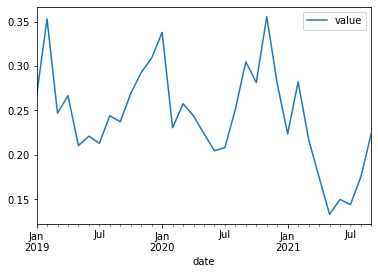

In [25]:
df.loc[pd.IndexSlice[:, 'Zch_Stampfenbachstrasse', 'CO']].plot()

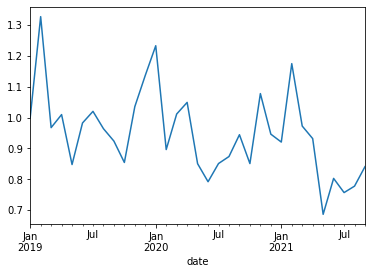

In [62]:
temp = df.reset_index()
temp = temp.groupby(['date', 'pollutant']).mean()['value'].unstack('pollutant')
temp = temp.sort_index()
temp = temp / temp.iloc[0]
temp = temp.mean(axis=1)
temp.plot();

In [38]:
temp = df.loc[pd.IndexSlice[df.index.get_level_values('date').max(), :, :]]
temp = temp.reset_index()
temp = temp.groupby(['date', 'pollutant']).mean()['value'].unstack('pollutant')
{ 'date': np.datetime_as_string(temp.index.values[0]), 'values': temp.iloc[0].to_dict() }

{'date': '2021-09-29T23:00:00.000000000',
 'values': {'CO': 0.22578671328671346,
  'NO': 11.506445494050418,
  'NO2': 24.75514314675781,
  'NOx': 22.170292999256556,
  'O3': 52.591168301606025,
  'PM10': 15.240036692844676,
  'PM2.5': 10.867979770215237,
  'SO2': 0.6413309982486862}}

In [63]:
df.reset_index().date.dt.hour.unique()

array([0])